**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---



```
# Tiene formato de código
```

*   NOMBRE: Alfredo Ricardo Suárez Espinosa
*   MATRÍCULA: A01213723


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as
import os

In [4]:
#lectura desde drive---se ejcutó el ejercicio en Google Colab
#df = pd.read_csv('/content/drive/MyDrive/IA ITESM/Ciencia de Datos/LaqnData.csv')

In [ ]:
df = pd.read_csv('./LaqnData.csv')

In [5]:
df.shape

(43800, 6)

In [6]:
df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [7]:
df.head(3)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R


In [8]:
df.tail(3)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [9]:
df.dtypes

,0
Site,object
Species,object
ReadingDateTime,object
Value,float64
Units,object
Provisional or Ratified,object


In [24]:
#Cálculo % de cada columna faltante
null_perc = df.isnull().mean() * 100
null_perc

,0
Species,0.000000
ReadingDateTime,0.000000
Value,7.374429


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron? 8,760 dado cantidad de regitros (rows hay)
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron? 5
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe. Columns: Site,
Provision/Rectified, Units
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [11]:
df.nunique(axis=0, dropna=True)

,0
Site,1
Species,5
ReadingDateTime,8760
Value,1847
Units,3
Provisional or Ratified,1


In [19]:
unique_vals = df.apply(lambda col: col.unique())

In [20]:
unique_vals

,0
Species,"[NO, NO2, NOX, PM10, PM2.5]"
ReadingDateTime,"[01/01/2017 00:00, 01/01/2017 01:00, 01/01/201..."
Value,"[3.5, 3.6, 2.2, 2.1, 3.3, 4.4, 5.1, 7.4, 6.5, ..."


In [18]:
df = df.drop(['Site','Provisional or Ratified', 'Units'], axis=1)

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [27]:
df.Species.value_counts() #Hace match con lectura que tiene: df.nunique(axis=0, dropna=True)

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [30]:
df.groupby('Species').agg({'Value':'mean'}).reset_index()

,Species,Value
0,NO,15.045115
1,NO2,38.010185
2,NOX,61.078661
3,PM10,22.551704
4,PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [31]:
pvt_df = df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?120.20 -- 24/01/2017 19:00
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?-5.60 -- 13/09/2017 02:00
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta? 7.10; es el valor central, es decir; donde la mitad  de valores están por debajo yel otro 50% por arriba
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?7.0; 1 de cada 4 registros están por debajo del valor de 7 unidades.

In [33]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [36]:
max_idx = pvt_df['NO2'].idxmax()
max_idx

'24/01/2017 19:00'

In [37]:
min_idx = pvt_df['NO2'].idxmin()
min_idx

'13/09/2017 02:00'

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?NOX, ya que tiene mayor std de 54.585, así como su sesgo es característica de alta variabilidad

array([[<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

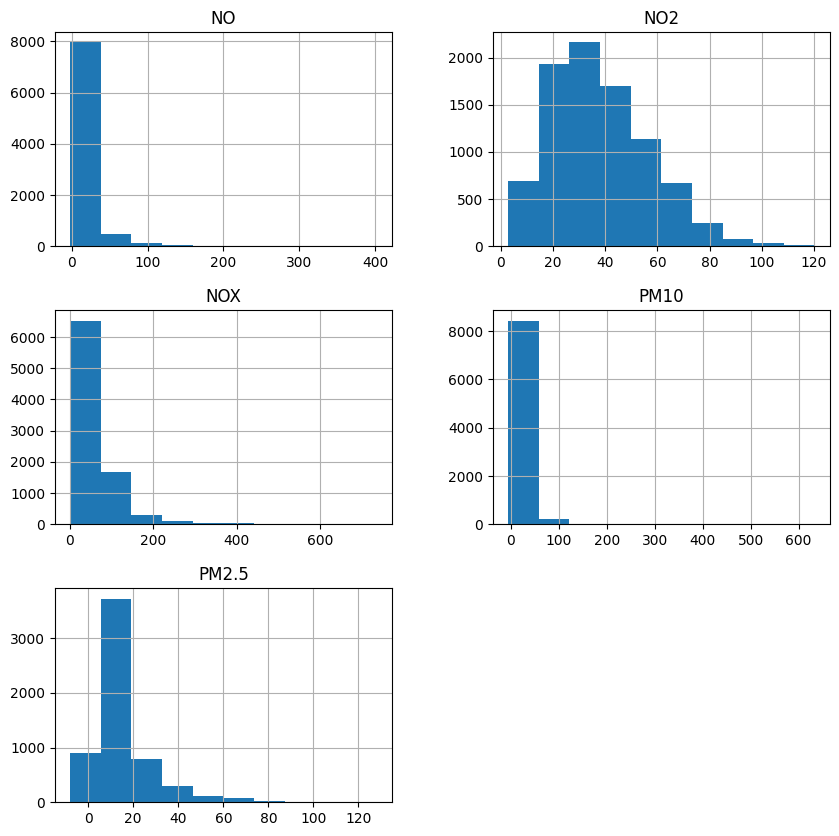

In [38]:
pvt_df.hist(figsize=(10,10))

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [44]:
#Primero se cambió la variable air_df por df, ya que air_df no está definida
datetime_df = df.ReadingDateTime.str.split(' ',expand=True)#Separa 'ReadingDateTime' en dos partes: fecha y hora.
datetime_df.columns = ['Date','Time'] #Se renombra columnas Date y Time
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)#Separa 'Date' en tres partes: día, mes y año (formato DD/MM/YYYY).
date_df.columns = ['Day','Month','Year']# Renombra las columnas como 'Day', 'Month' y 'Year'.
date_df
air_df = df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])# Une el dataframe original con las nuevas columnas de fecha y hora, luego elimina 'ReadingDateTime' & 'Year'.
air_df = air_df.set_index(['Month','Day','Time','Species'])# Reorganiza el índice del dataframe usando: mes, día, hora y especie.
air_df#Libera el nuevo dataframe, donde existe una columna como tal el Value, lo demás se vuelve índice

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

In [46]:
air_df.shape

(43800, 1)

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [41]:
air_df.unstack()#No, ya que las species(contaminanates) están en columnas y el Value y no dentro de una registros/índice; dado el datafarme anterior.

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [47]:
air_df.unstack().shape

(8760, 5)

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt:
1.Es más flexible para especificar qué columnas conservar como identificadores
2.Permite especificar explícitamente variables ID y variables de valor
3.Genera dos columnas principales: una para nombres de variables y otra para valores.

Pivot:

1.Requiere tres columnas clave: índice, columnas y valores
2.Más control sobre cómo reorganizar los datos en formato ancho

Stack()
1.Opera a nivel del índice, convirtiendo columnas en niveles de un índice MultiIndex
2.Trabaja mejor con datos ya indexados o con jerarquías
3.Más orientado a operaciones con índices jerárquicos
Unstack()
1.Convierte un nivel específico de un MultiIndex en columnas
2.Ofrece mayor control sobre qué nivel del índice se convierte en columnas

Conclusión:
Stack() y melt() transforman columnas en filas.
Pero en cuanto a uso, es egún el caso, ya que:
reestructuran datos de forma similar, en el caso de stack() requiere un índice jerárquico; mientras que melt() opera directamente sobre columnas.